In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [38]:
df = pd.read_csv('./data/developer_survey_2019/survey_results_public.csv')

In [39]:
df = df[df['JobSat'].notna()]

In [40]:
country_whitelist = [
  'United States', 
  'India',
  'Germany', 
  'Canada', 
  'Japan',
  'Sweden', 
]
df = df[df['Country'].isin(country_whitelist)]
df = df[df['Ethnicity'] == 'South Asian']
print(len(df))

4573


In [41]:
sat_mapper_lut = {
    'Very dissatisfied' : 0,
    'Slightly dissatisfied' : 0.25,
    'Neither satisfied nor dissatisfied' : 0.5,
    'Slightly satisfied' : 0.75,
    'Very satisfied' : 1,
}
df['JobSatNum'] = df.apply(lambda row: sat_mapper_lut[row['JobSat']], axis=1)
# df.head()

In [42]:
df = df[df['YearsCodePro'] != 'Less than 1 year']
df['YearsCodePro'] = df['YearsCodePro'].astype(float)
df = df[df['YearsCodePro'] < 21]

Text(0.5, 1.0, 'Job Satisfaction of South Asians by country')

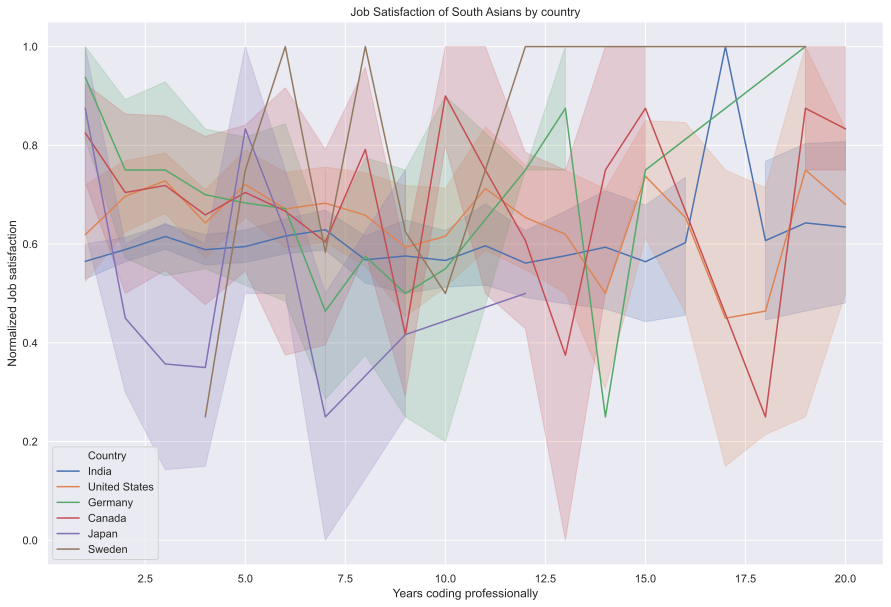

In [43]:
sns.set(rc={'figure.figsize':(15,10)})
g = sns.lineplot(data=df, x='YearsCodePro', y='JobSatNum', hue='Country')
g.set_xlabel('Years coding professionally')
g.set_ylabel('Normalized Job satisfaction')
g.set_title('Job Satisfaction of South Asians by country')